------
------
# SISTEMAS DE CONTROL II - FCEFyN - 2025
## Alumno: Ferraris Domingo
----
----

## Control En Variables De Estado
-----

### Resultados

#### Item 1:  Pendulo, Asignacion De Variables, Linearizacion
Se asignaron las variables de estado y se definio el **punto de equilibrio deseado**  
Mediante Octave se **linealizo el sistema entorno a el equilibrio** definido y se obtuvo el modelo lineal local
Y con el modelo las matrices del sistema para el diseño del control:

<!-- 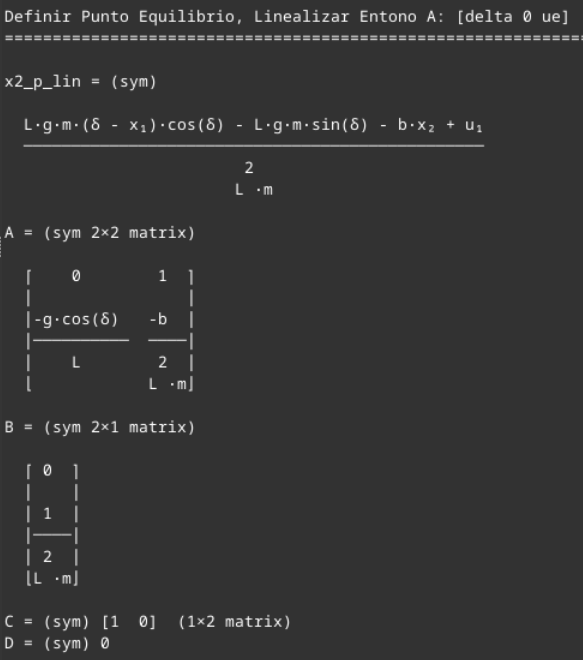 -->

<!-- 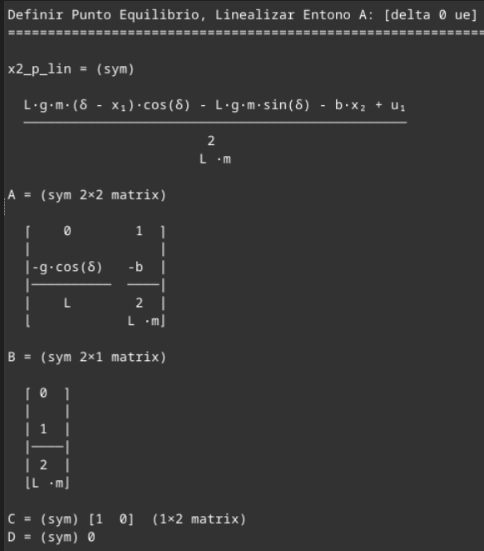 -->

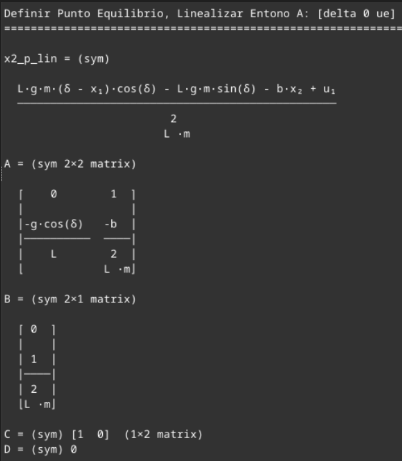

#### Item 2: Sistema Lineal, Estabilidad, Controlabilidad
Mediante Octave se verifico **estabilidad** mediante el metodo indirecto de Lyapunov y **controlabilidad** del modelo lineal  

#### Item 3: Diseño De Controladores
Se realizo el diseño del **control por realimentacion de estados con accion integral**, por tanto se trabajo con el sistema ampliado  
Se diseñaron **controladores por asignacion de polos y LQR** y se compararon las respuesta obtenidas  
Los controladores LQR mostraron mejores caracteristicas en las respuestas  

#### Item 4: Robustez
Finalmente se realizo un **estudio sencillo de robustez** donde se varia la masa +/- 10% y se observan los cambios en las respuestas para cada controlador  
Aqui el diseño por asignacion de polos demostro ser superior  

----


### Detalles

#### Item 1:  Pendulo, Asignacion De Variables, Linearizacion
La idea seguida fue tomar las ecuaciones y **asignar variables de estado** mediante asignacion de fase, luego **definir el punto de equilibrio deseado** y linealizar entorno a ese punto  

Para comenzar se tomo la ecuacion del pendulo y se asignaron las variables de estado mediante la asignacion de fase, para luego poder dibujar el espacio fasico facilmente  
Y tambien se definieron al torque como entrada u1 y al angulo theta como y1: 

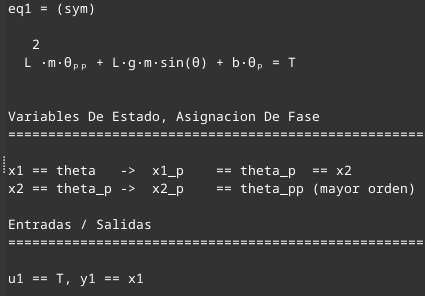

Reemplazando variables, entradas, salidas y reordenando se obtuvo el **modelo dinamico del sistema:**

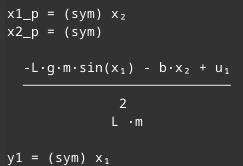

El objetivo es **estabilizar el sistema en x1 = delta**, para esto se diseñara un controlador  
Pero ademas como el sistema es no-lineal, se debe linealizar **entorno a algun punto de operacion**  

Como el diseño del controlador se basa en el sistema linealizado, se elige como punto de operacion el equilibrio deseado x1 = delta  
Cuando el sistema alcanza ese equilibrio, hace falta un torque u1 = ue para **mantenerlo en el equilibrio deseado**  
Aplicando la condicion de equilibrio al modelo dinamico:



Entonces el punto de operacion para linealizar:
> #### Equilibrio:
> * **[x1, x2, u1] == [delta, 0, m g L sin(delta)]**
> ##### .

Mediante octave se obtuvo el **modelo linealizado** y luego las matrices del sistema:

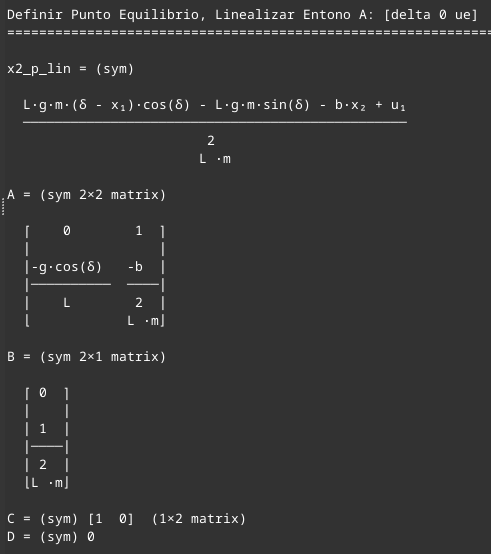

----

#### Item 2: Sistema Lineal, Estabilidad, Controlabilidad
Con los parametros asignados se calcularon las matrices A,B,C y D del modelo:

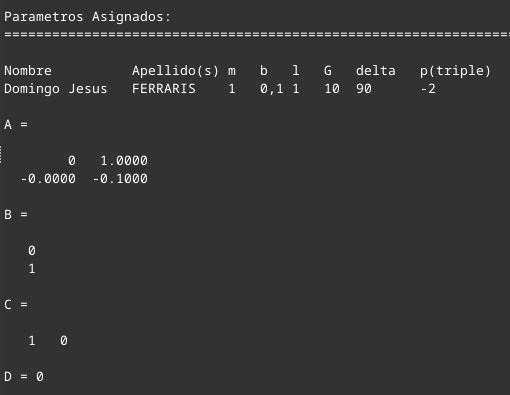

Luego se comprobo estabilidad con los autovalores de la matriz A y controlabilidad:

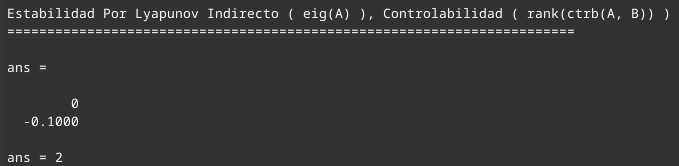

Como un autovalor es cero no el sistema es **inestable en el punto de operacion**, pero como el rango de la matriz de controlabilidad es 2 entonces **es controlable**

----

#### Item 3: Diseño De Controladores
Para la accion de control se utilizo un **controlador con realimentacion de estados y accion integral**, por lo tanto se calculo el sistema ampliado y comprobo estabilidad y controlabilidad:

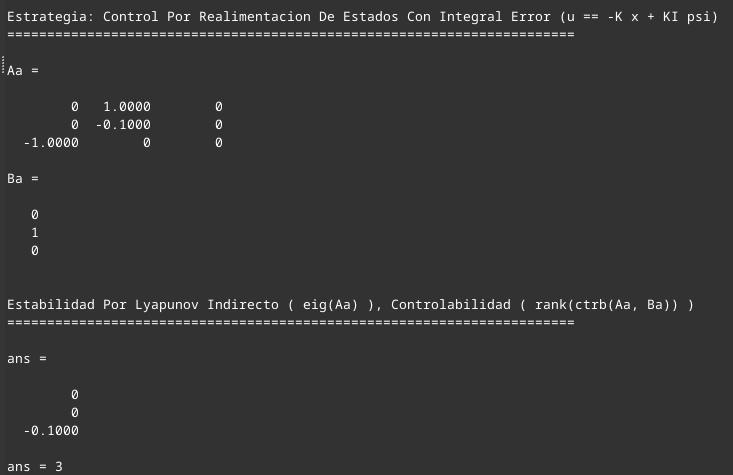

Dos autovalores nulos por tanto el sistema ampliado es **inestable en el punto de operacion, pero controlable**

#### Por Asignacion De Polos
Siguiendo la consigna se calculo el controlador por asignacion de polos, con el comando acker de Octave posicionando un **polo triple el -2**  
Luego se simulo el sistema partiendo de theta = 0 para observar la respuesta y espacio de fase:

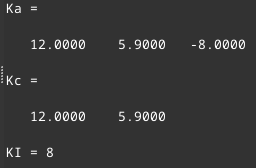

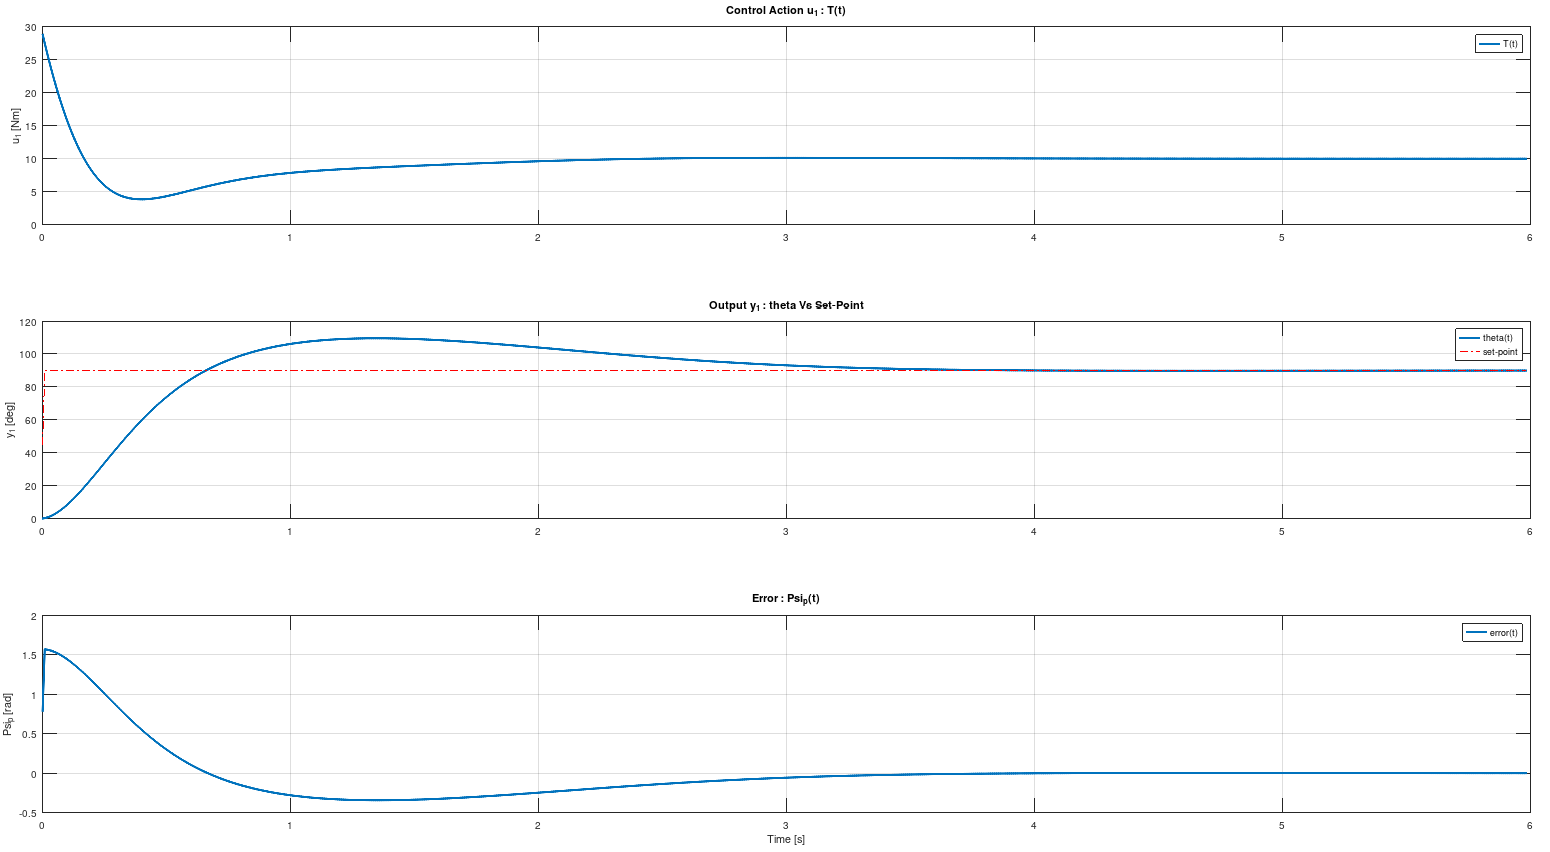

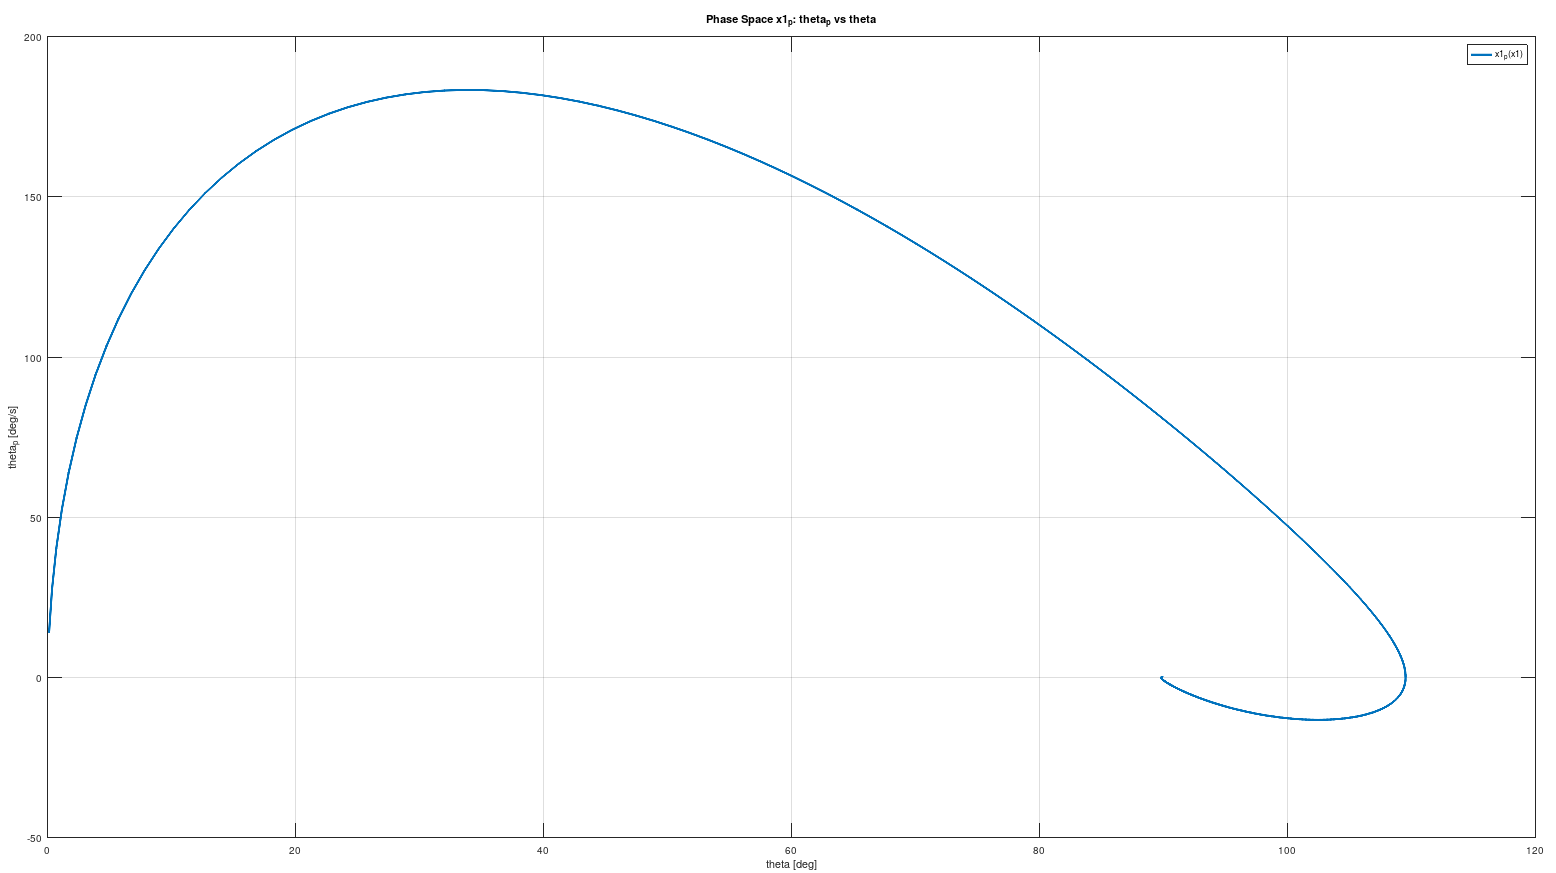

Se tomaron notas de algunos valores de interes de las respuestas para comparacion:
> * **tss ~ 3.2s**
> * **theta_max ~ 100 grados**
> * **u1_max ~ 30Nm**

#### Por LQR
Adicionalmente se diseñaron otros controladores por LQR ajustados con distintos valores de Q y R, **trantando de mejorar las respuestas obtenidas** siempre que fuera posible:

***LQR1: Penalizar fuertemente desviaciones de theta, penalizar poco accion de control***  

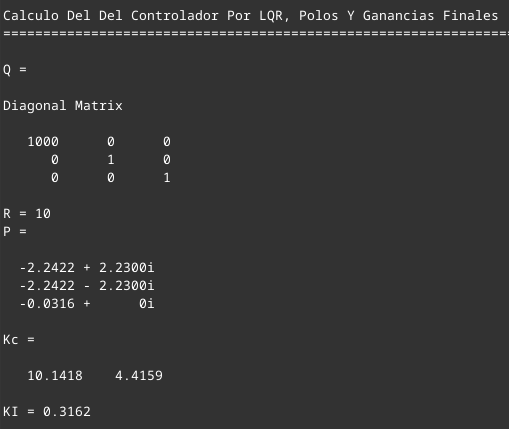

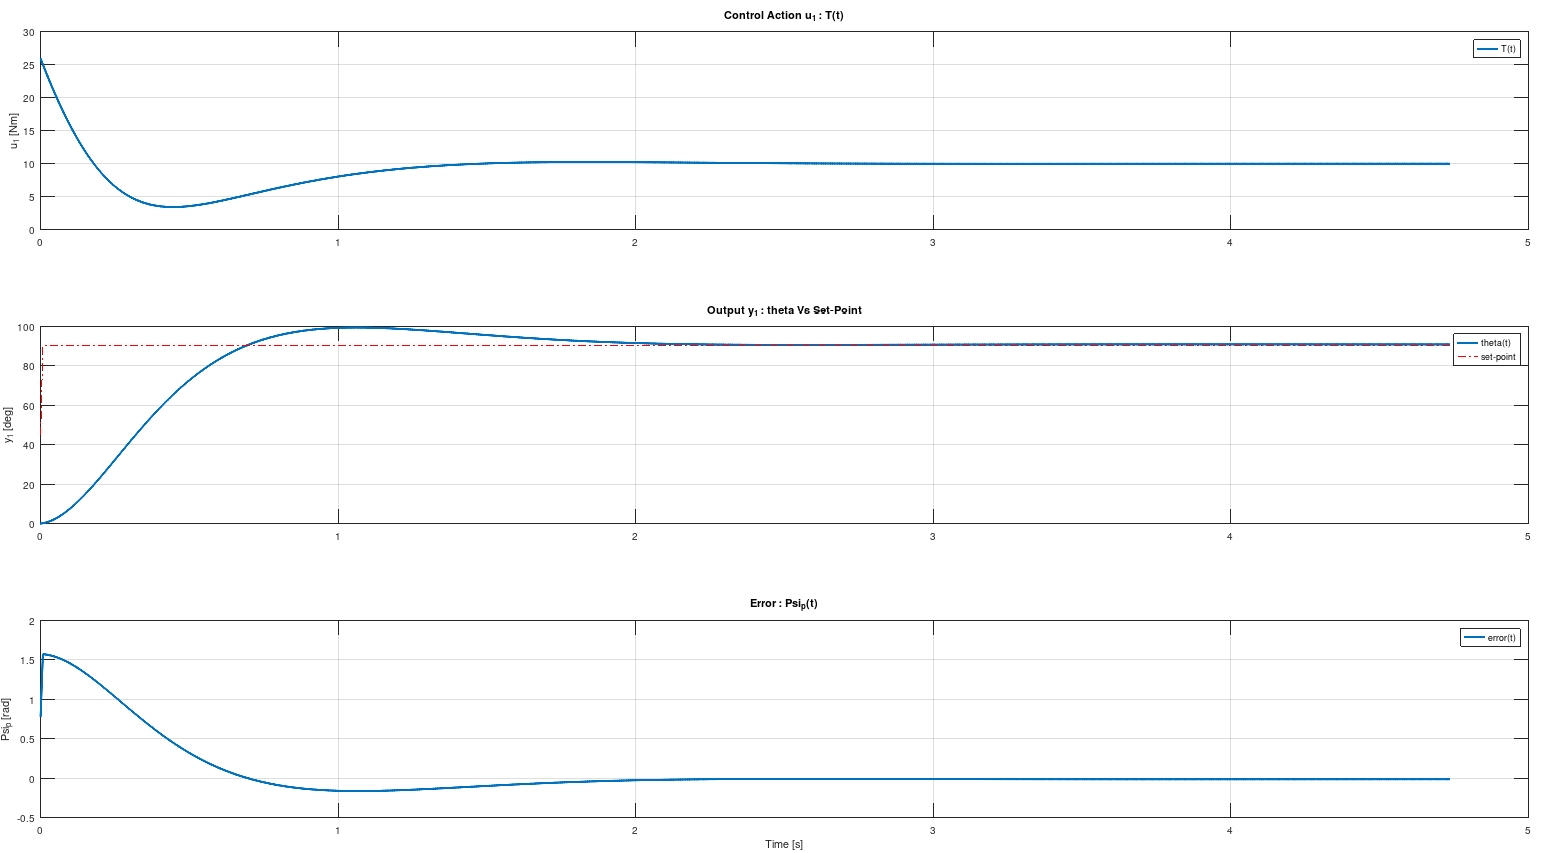

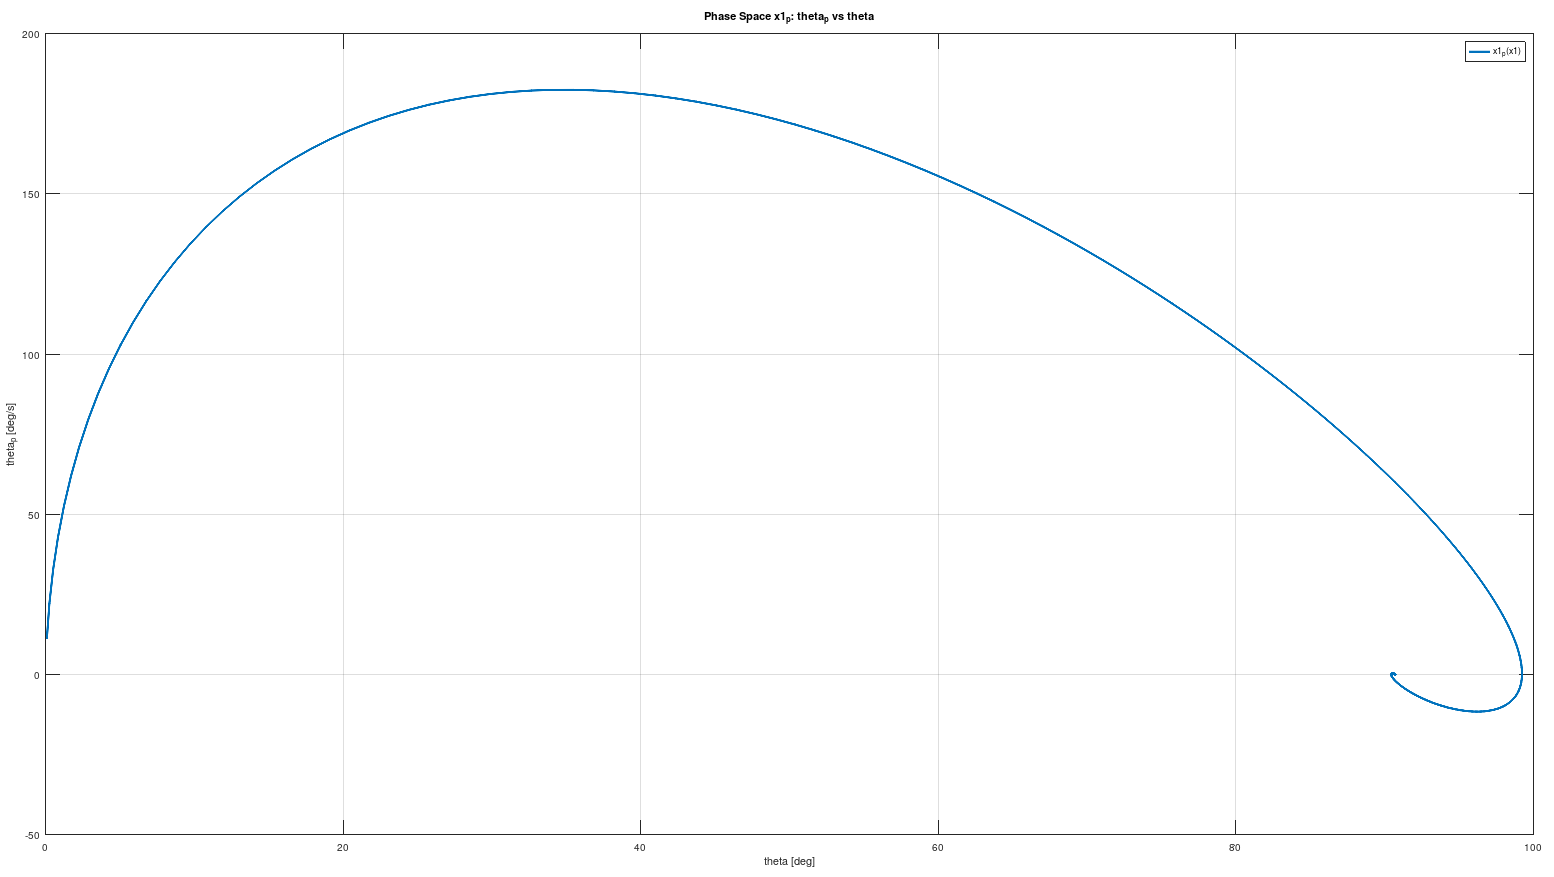

Para este controlador se obtienen tss ~ 1.9s, theta_max ~ 100 grados y u1_max ~ 26Nm, mejorando con respecto a la respuesta obtenida por asignacion de polos

***LQR2: Penalizar mas a theta que a theta_p, penalizar u1 para ajuste***  

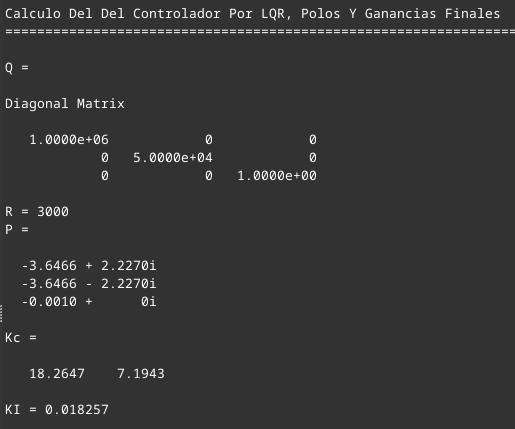

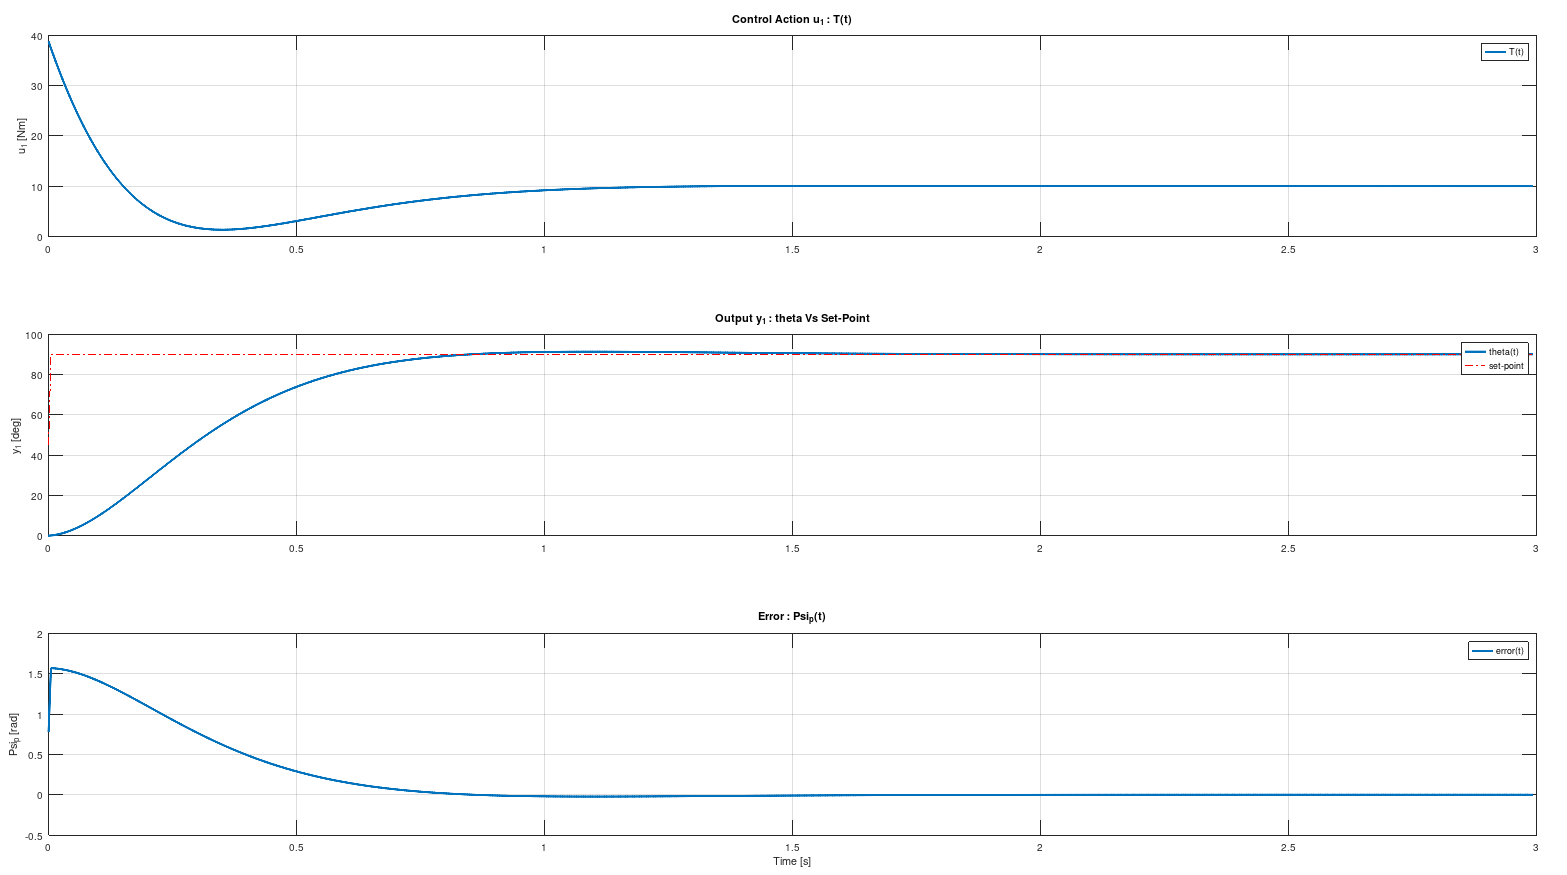

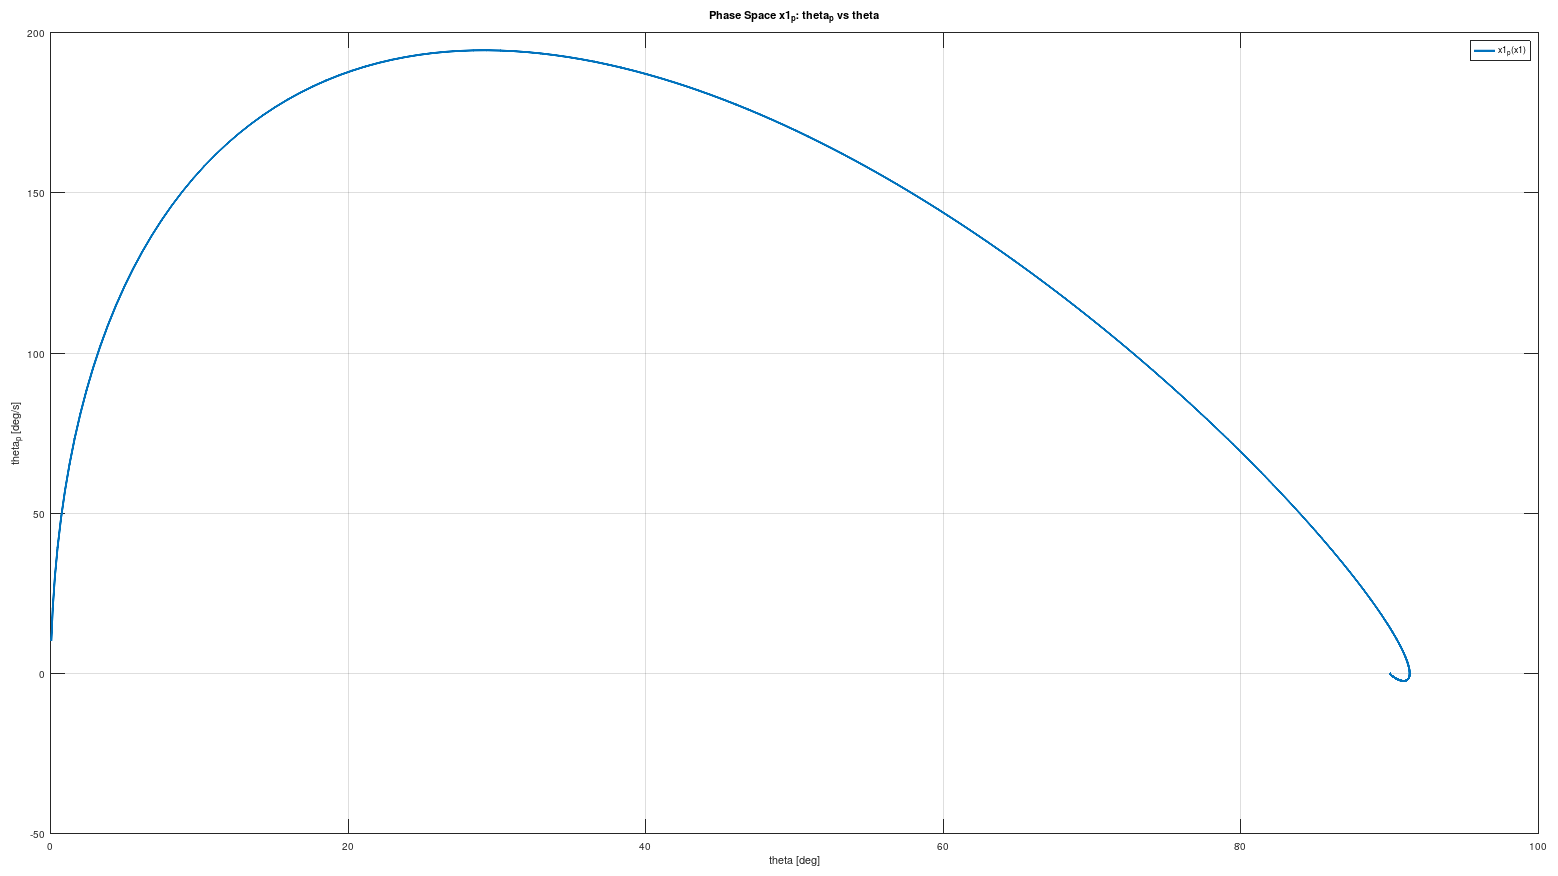

Para este controlador se obtienen tss ~ 0.75s, theta_max ~ 91 grados y u1_max ~ 40Nm, mejorando rapidez y sobrepico pero aumentando accion de control con respecto a la respuesta obtenida por asignacion de polos

----

#### Item 4: Robustez
Finalmente para los controladores diseñados se hizo un estudio de robustez para ver **como afecta su desempeño variar la masa +/-10%**

#### Por Asignacion De Polos
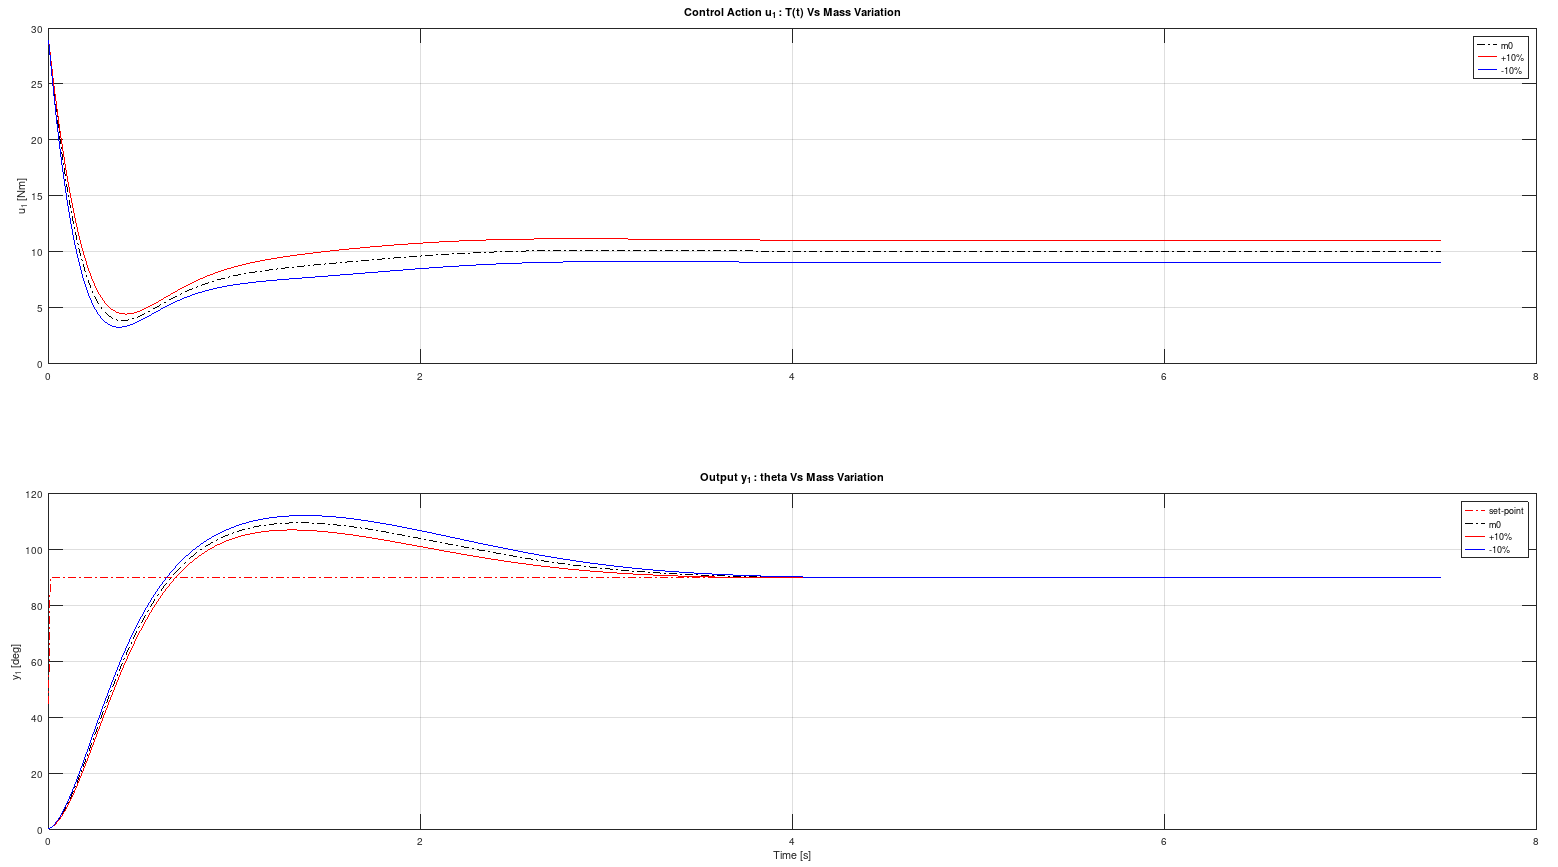

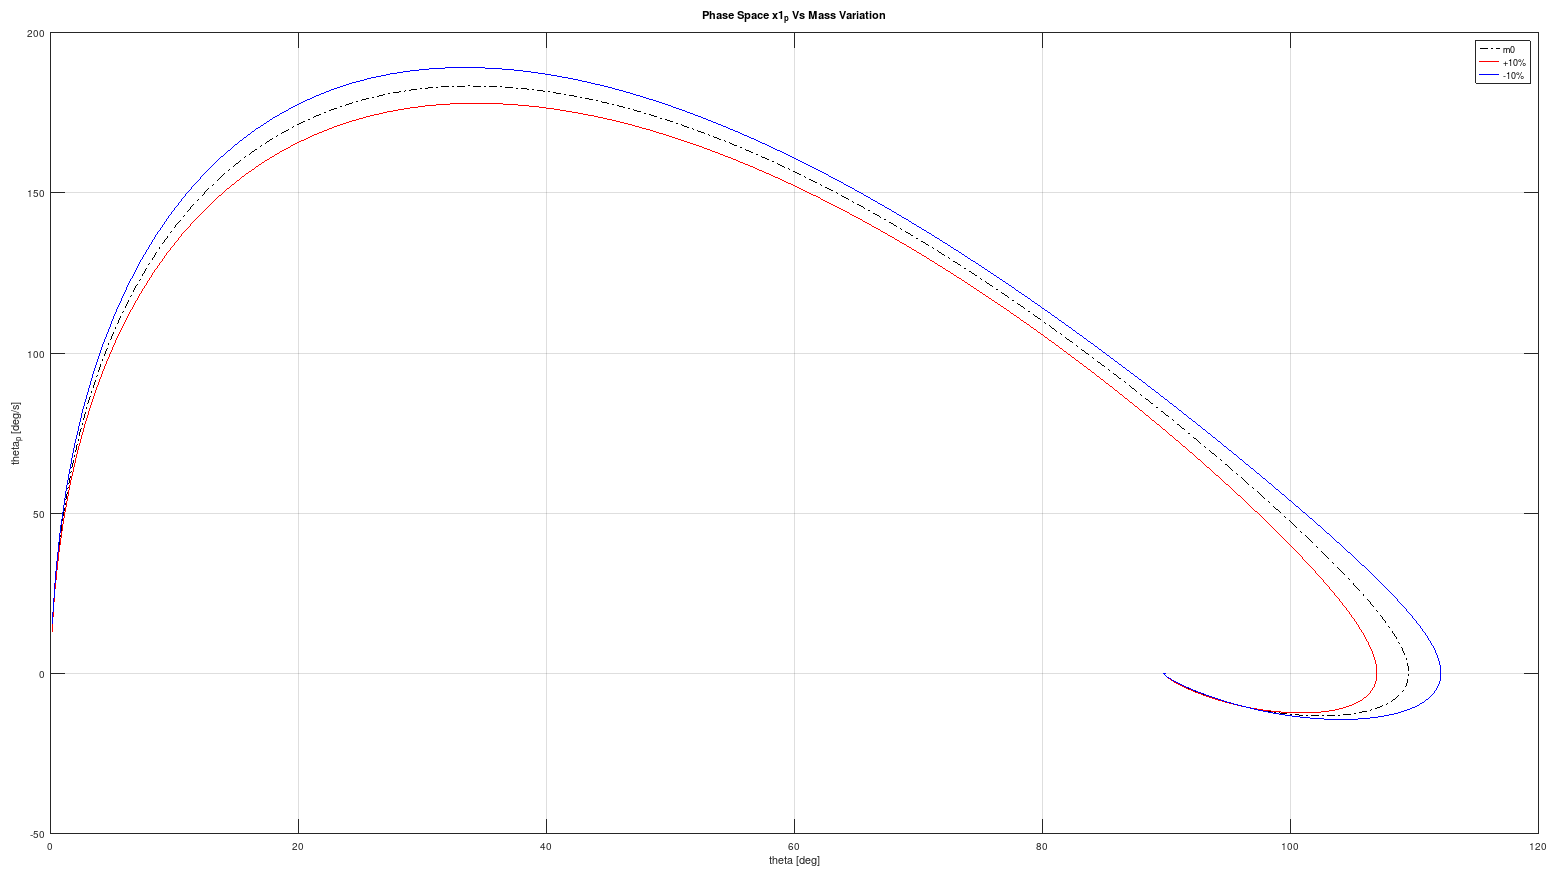

> En este caso en equilibrio u1 se mantiene entre [9-10]Nm, theta_max [112-107] grados, tss entre [3-3.3]s y un ess = 0

#### Por LQR1
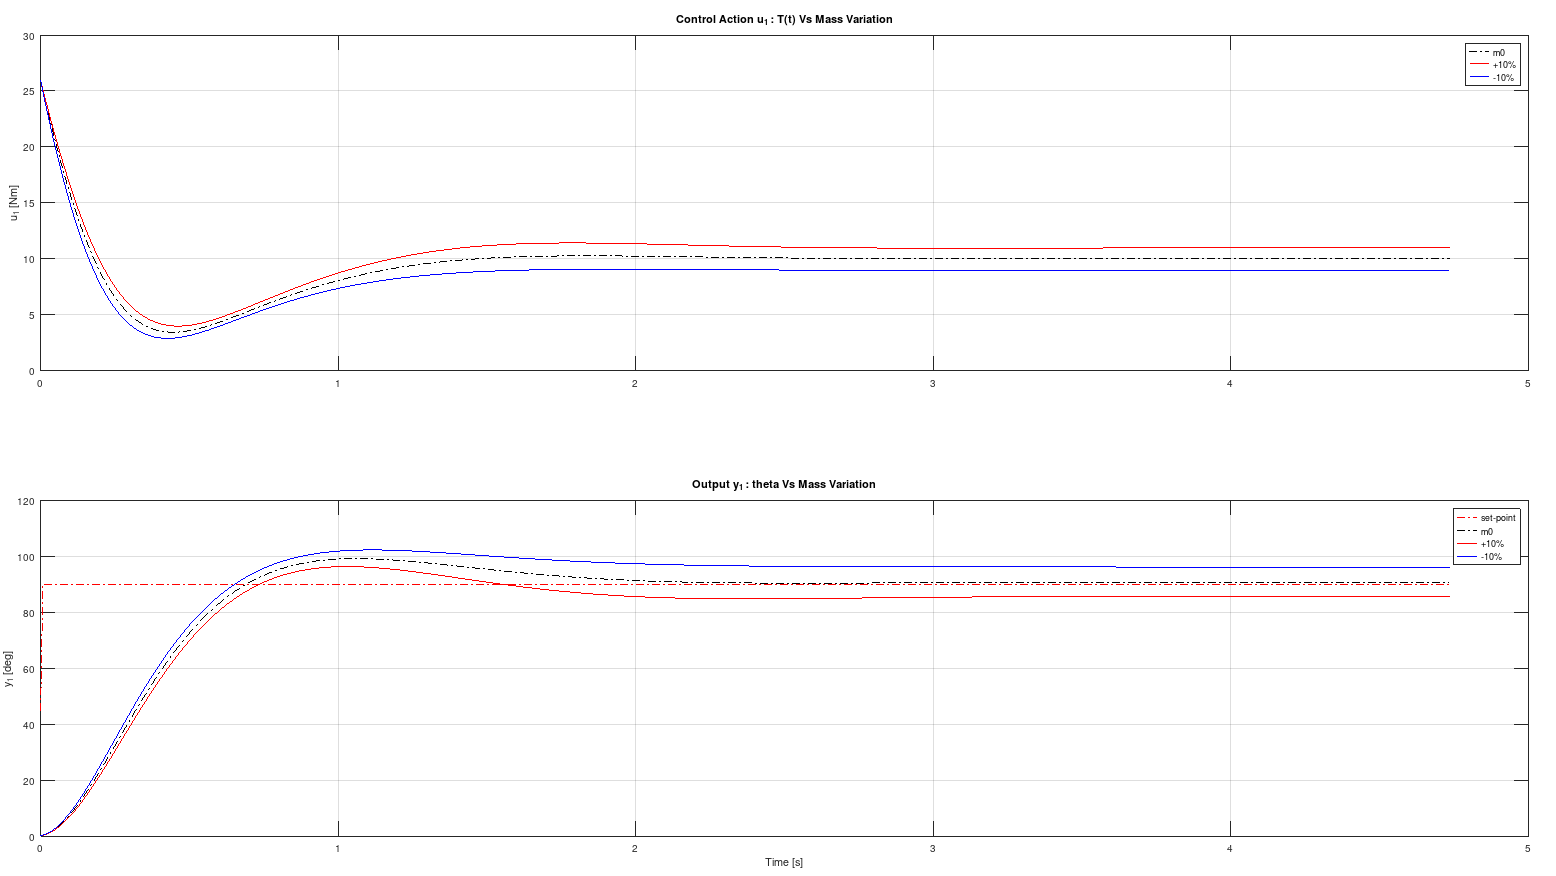

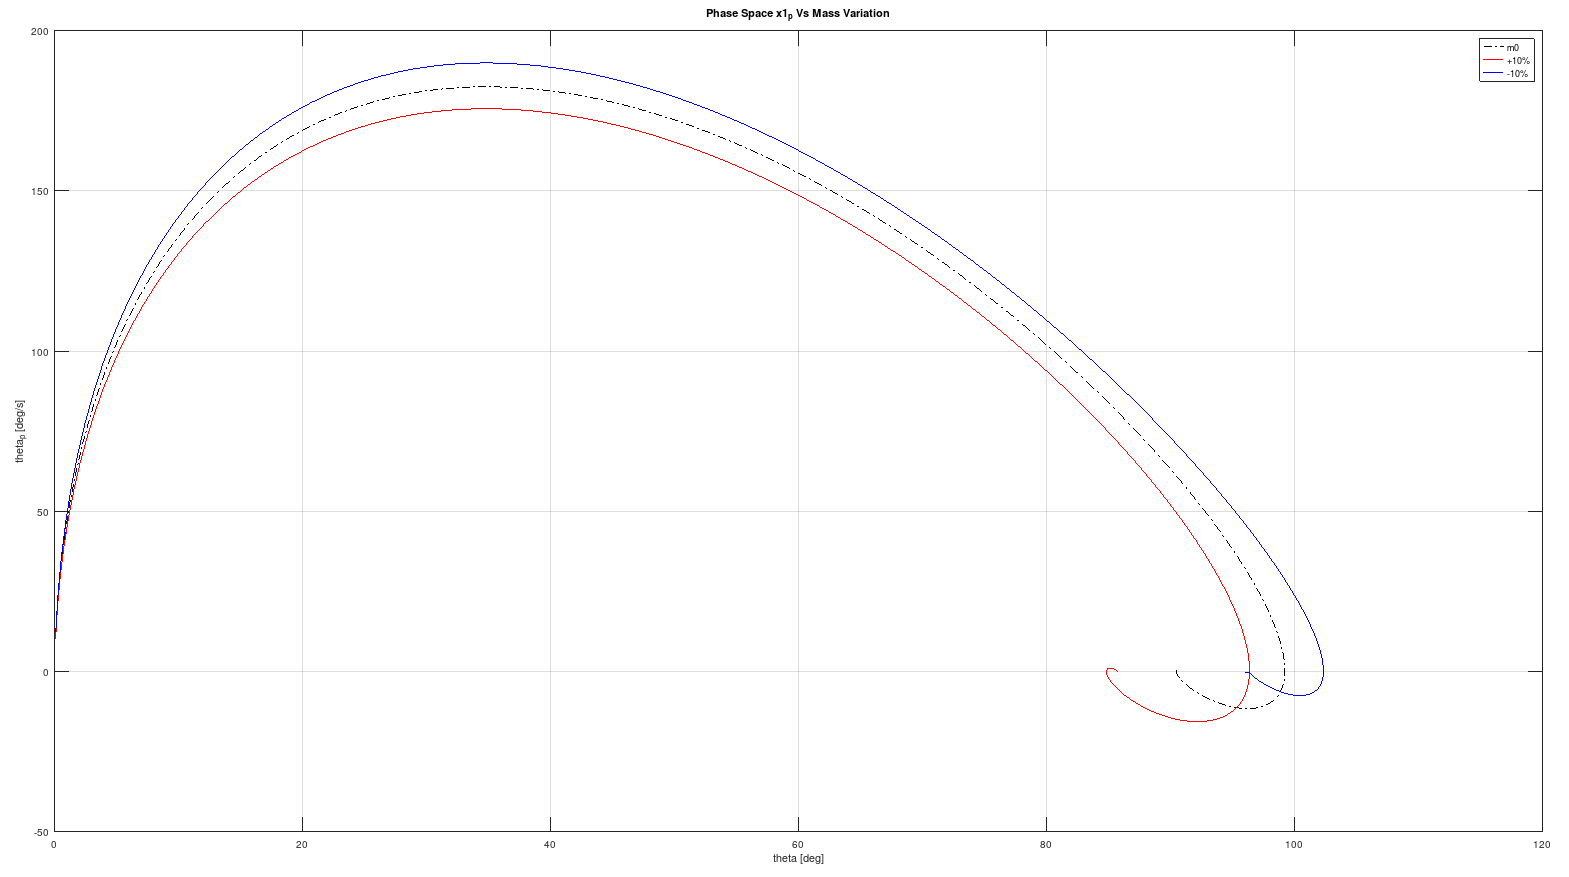

> En este caso en equilibrio u1 se mantiene entre [9-11]Nm, theta_max [102-96] grados pero ess no es nulo y se mantiene entre [96-86] grados, por lo que esta configuracion es muy suceptible a la variacion de la masa

#### Por LQR2
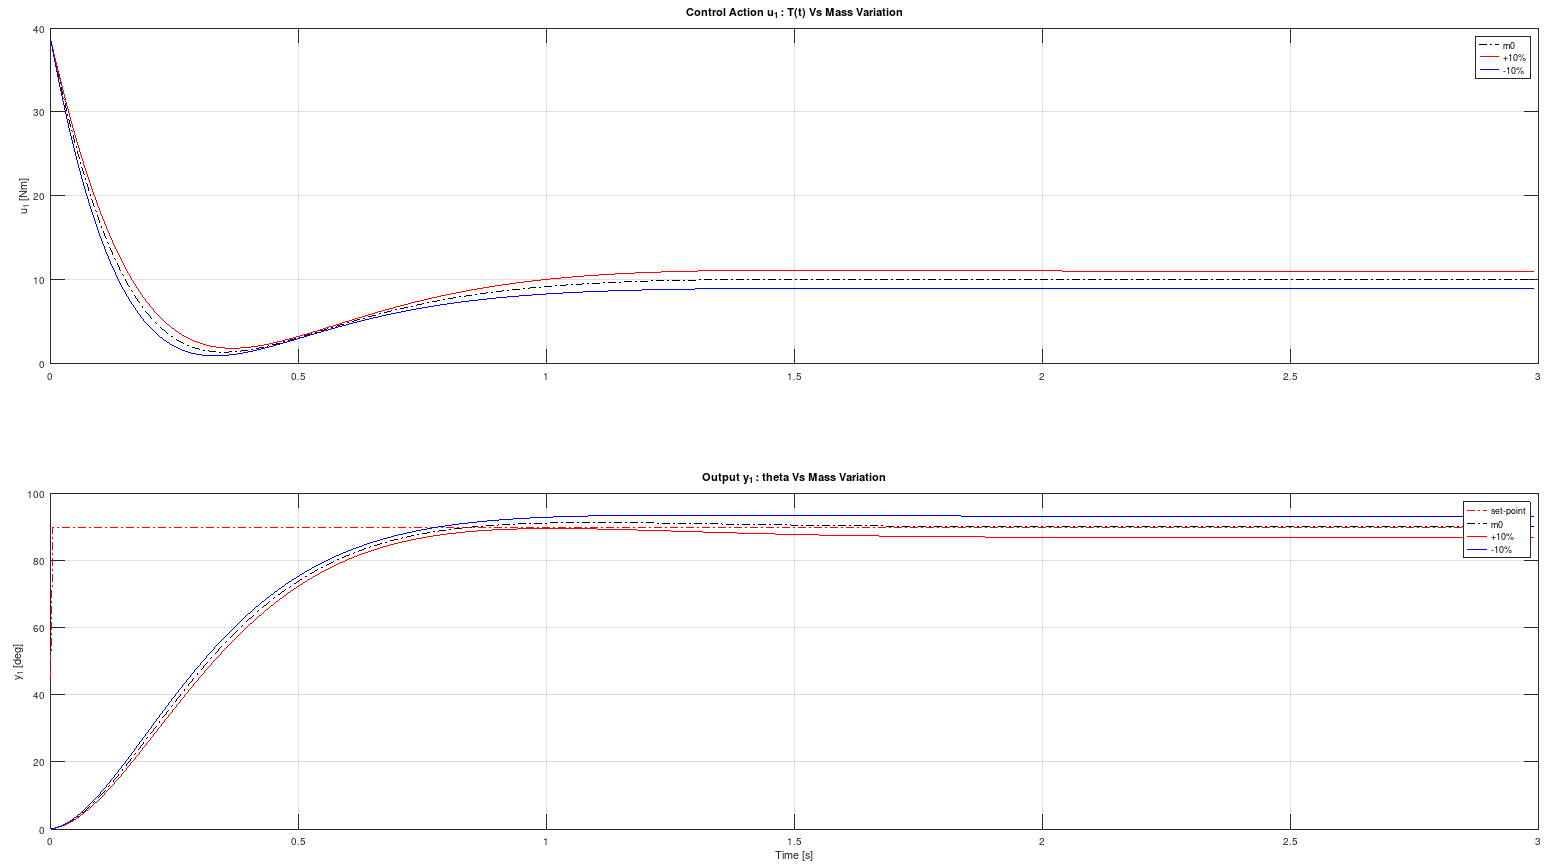

> En este caso en equilibrio u1 se mantiene entre [9-11]Nm, theta_max [94-90] grados pero nuevamente ess no es nulo y se mantiene entre [93-87] grados, por lo que esta configuracion es muy suceptible a la variacion de la masa

| Control / [-10% - +10%] | theta_max [grados]  | Mp [%]    | u_eq [Nm] |
|-------------------------|---------------------|-----------|-----------|
| Asignacion              | [112 - 107]         | [24 - 19] | [9 - 10]  |
| LQR1                    | [102 - 96]          | [13 - 6]  | [9 - 11]  |
| LQR2                    | [94 - 90]           | [4 - 0]   | [9 -11]   |

----
En conclusion, se forzaron demasiado los controladores por LQR dando **respuestas temporales mejores pero haciendo que fallen en robustez** frente al control por asignacion de polos   

Por tanto si en la aplicacion la variacion de masa se mantiene menor al 10% es viable usar uno de los controladores LQR propuesto, caso contrario es recomendable el controlador por asignacion de polos

Siempre se puede ademas **iterar nuevamente para ajustar los controladores por LQR** hasta obtener un balance aceptable entre la respuesta/accion obtenidas y la robustez 

----


----------

## Fuentes/herramientas
1. Apuntes/Videos De La Materia
2. Matlab, Simulink, Chat-GPT, vscode

## GitHub
1. https://github.com/Clifferto/carrerpath/tree/control2/nationalUniversity/2025/controlSystems2  

----------